# Part 1: Exploratory data analysis

We will explore the student performance dataset. Using this dataset as it contains all types of features, and can be used to showcase proeprocessing forall

# 1 - Import required packages

In [ ]:
# Import required packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') # Reduces unnecessary outputs


# 2 - Data collection

## 2.1 - Import dataset CSV file

In [ ]:
raw_data = pd.read_csv('data/data.csv')

## 2.2 - Basic information on file

### Shape

In [ ]:
raw_data.shape

### Head

In [ ]:
raw_data.head(10)

### Tail

In [ ]:
raw_data.tail(10)

# 3 - Data Validation

List of basic checks
 - Verify data types for dataframe
 - Missing values
 - Duplicates
 - data types
 - Unique values present
 - Statistics of each attribute
 - Distinct categories in each column

## 3.1 - Verify data types when importing

In [ ]:
raw_data.info()

## 3.2 - Missing values

### NO missing values in any column

In [ ]:
raw_data.isna().sum()

## 3.3 - Duplication

### NO duplicated entries

In [ ]:
raw_data.duplicated().sum()

## 3.4 - Check # of unique values

In [ ]:
raw_data.nunique()

## 3.5 - Print statistics of dataset

### The means (~68 avg) and SDs (~15 avg) for student grades are extremely similar.

### Students seem to have scored 0 for math, while minimum for reading and writing is 15 (makes sense logically as students will have basic reading writing skill irrespective)

### At least one student would have scored full in each area


In [13]:
raw_data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 3.6 - Check categories available


In [15]:
# Print all column names for easy use
raw_data.columns  

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [20]:
cat_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']
num_cols = ['math_score', 'reading_score', 'writing_score']

for col in cat_cols:
    print(f'Categories in ##{col}## are: {raw_data[col].unique()}')
    print("\n")

Categories in ##gender## are: ['female' 'male']


Categories in ##race_ethnicity## are: ['group B' 'group C' 'group A' 'group D' 'group E']


Categories in ##parental_level_of_education## are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in ##lunch## are: ['standard' 'free/reduced']


Categories in ##test_preparation_course## are: ['none' 'completed']




## 3.7 - Adding total score and average scores

In [ ]:
raw_data.columns.values

In [23]:
score_cols = ['math_score', 'reading_score','writing_score']

raw_data['avg_score'] = raw_data[score_cols].mean(axis = 1)
raw_data['total_score'] = raw_data[score_cols].sum(axis = 1)

raw_data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,avg_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,218
1,female,group C,some college,standard,completed,69,90,88,82.333333,247
2,female,group B,master's degree,standard,none,90,95,93,92.666667,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,148
4,male,group C,some college,standard,none,76,78,75,76.333333,229


# 4 - Visualizations

1. Distribution of scores individually
2. Distribution of scores by categories (if feasible)

## 4.1 - Histograms/Kernel density plots

### Observations
1. Female students have higher average and total scores (compared to male students)
    1. Distribution for total and average scores is similar. Average scores used for further exploration
2. Female and male students have similar distribution when considering "free" lunch, but effect may not be significant
3.  Students who completed test preparation course have lower average scores, which seems counter intuitive. Possible explanations:
    1. Test prep course is taken by lower performing students, and well performing students may avoid taking this course
    1. Material in prep course may not be effective.
4. Race_ethnicity seems to have some relation to the average scores
    1. Group D and E have similar scores across male and female students, and have overall higher scores compared to other groups
    1. Group A has lowest overall scores
    1. Group B and C show similar characterstic across genders

### Custom function for histograms

In [70]:
# Make a custom function to help quickly plot comparison histograms

def histogram_by_categories(df,col_cat_main, col_cat_sub, plot_metric):
    # df - dataframe
    # col_cat_main - main category column which will create overlapping histogram
    # col_cat_sub - sub category used for comparison on seperate histograms
    # plot_metric - metric for making histograms (i.e. x axis)

    sub_cat_list = df[col_cat_sub].unique() #List all sub categories for use
    
    subplot_rows = sub_cat_list.shape[0] # Each row with different parameter
    subplot_cols = 2 # Always 2 for overall, and one histogram with main categories together
    
    fig, ax = plt.subplots(subplot_rows,subplot_cols, figsize = (15,7*(subplot_rows-1)))
    for index, sub_name in enumerate(sub_cat_list):
        temp = raw_data.loc[raw_data[col_cat_sub] == sub_name,:]
        temp_size = temp.shape[0]

        plt.subplot(subplot_rows, subplot_cols, 2*index+1)
        sns.histplot(data = temp, x = plot_metric, bins = 20, kde = True, color = 'g')
        plt.title(plot_metric+" for \"" +sub_name+ "\" "+ col_cat_sub +" (n=%d)" %(temp_size))
        
        plt.subplot(subplot_rows, subplot_cols, 2*index+2)
        sns.histplot(data = temp, x = plot_metric, bins = 20, kde = True, hue = col_cat_main)
        
        plt.title(plot_metric+" for \""+sub_name+"\" " + col_cat_sub + " by " + col_cat_main +" (n=%d)" %(temp_size))
    
    # Show plot
    plt.tight_layout()
    plt.show()

### Average Score by gender

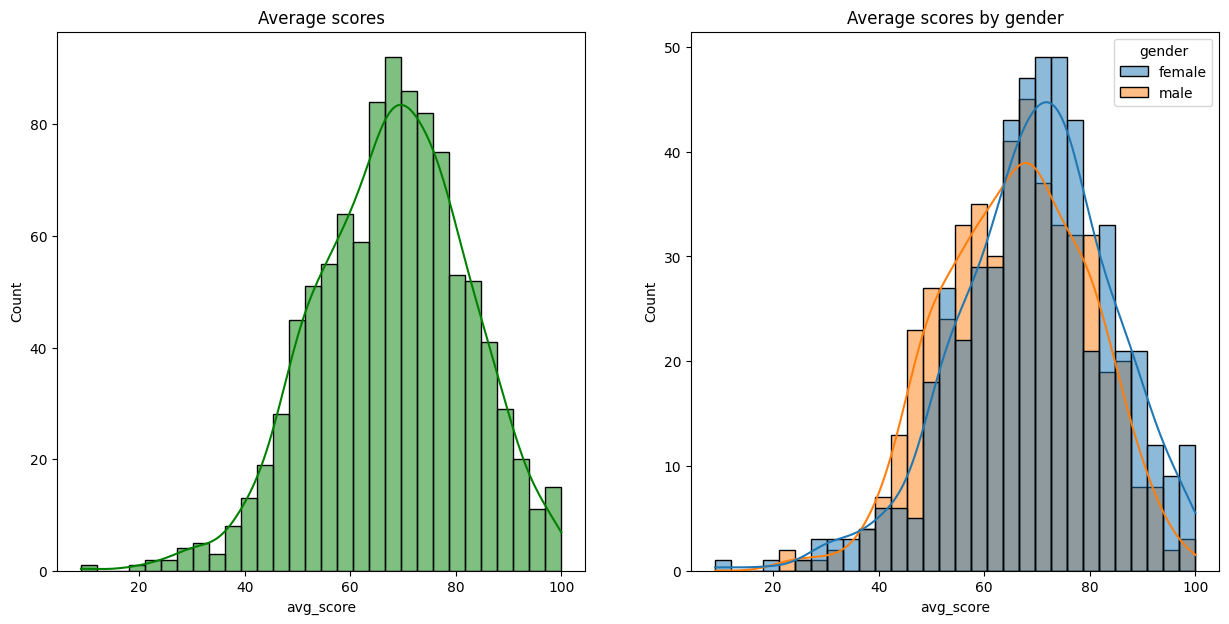

In [25]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = raw_data, x = 'avg_score', bins = 30, kde = True, color = 'g')
plt.title("Average scores")

plt.subplot(122)
sns.histplot(data = raw_data, x = 'avg_score', bins = 30, kde = True, hue = 'gender')
plt.title("Average scores by gender")

plt.show()

### Total Score by gender

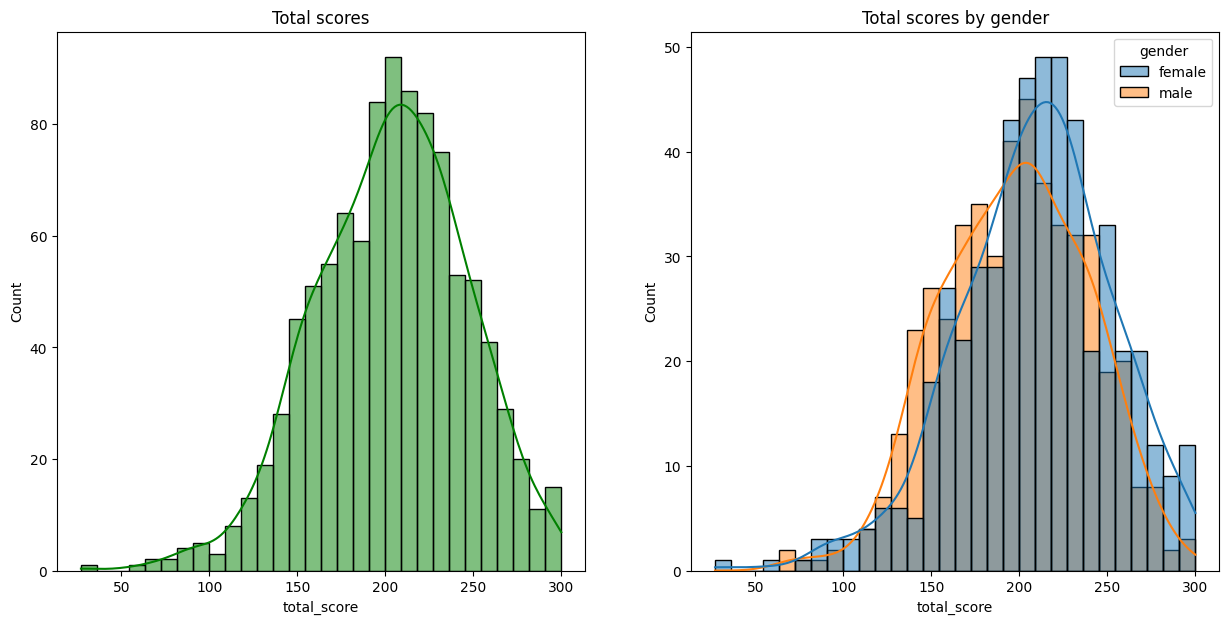

In [27]:
fig, ax = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data = raw_data, x = 'total_score', bins = 30, kde = True, color = 'g')
plt.title("Total scores")

plt.subplot(122)
sns.histplot(data = raw_data, x = 'total_score', bins = 30, kde = True, hue = 'gender')
plt.title("Total scores by gender")

plt.show()

### Score by gender and lunch category

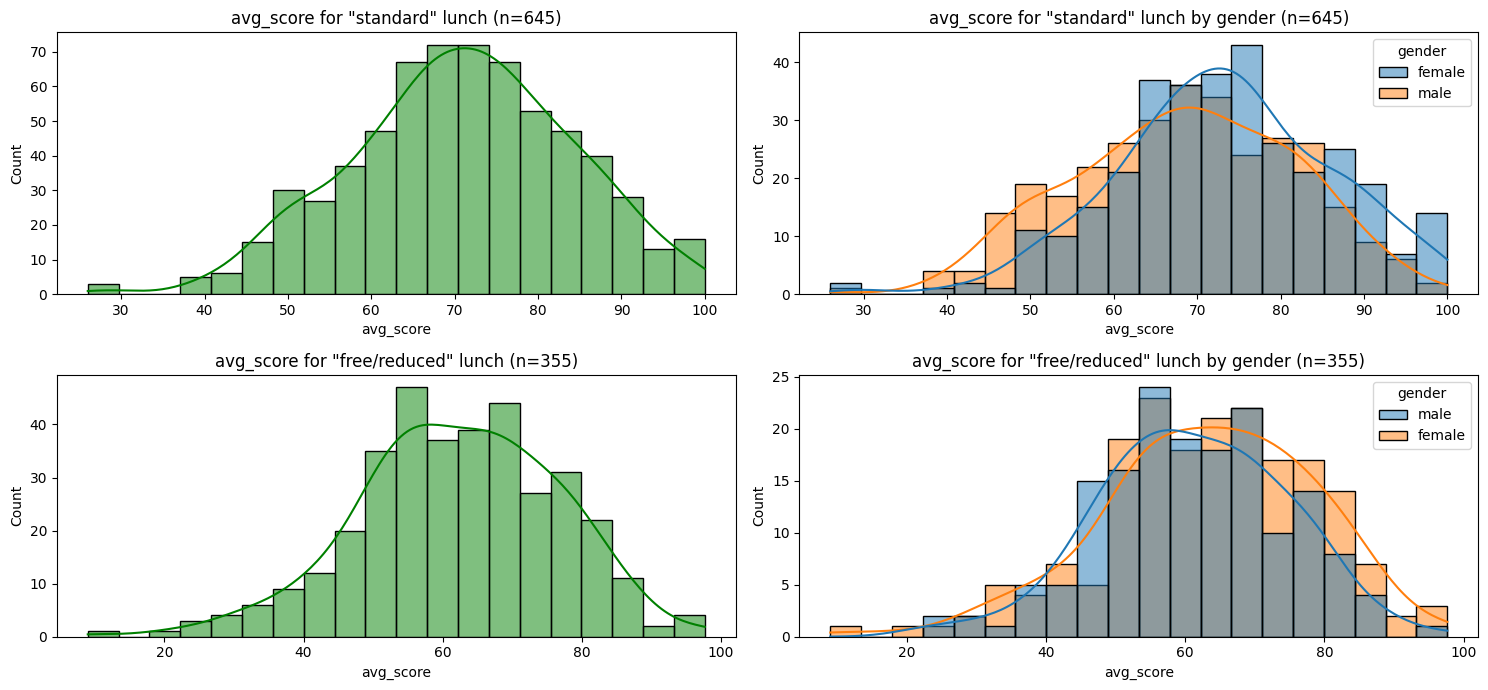

In [71]:
histogram_by_categories(raw_data, "gender","lunch","avg_score")

### Score by gender and test prep courses

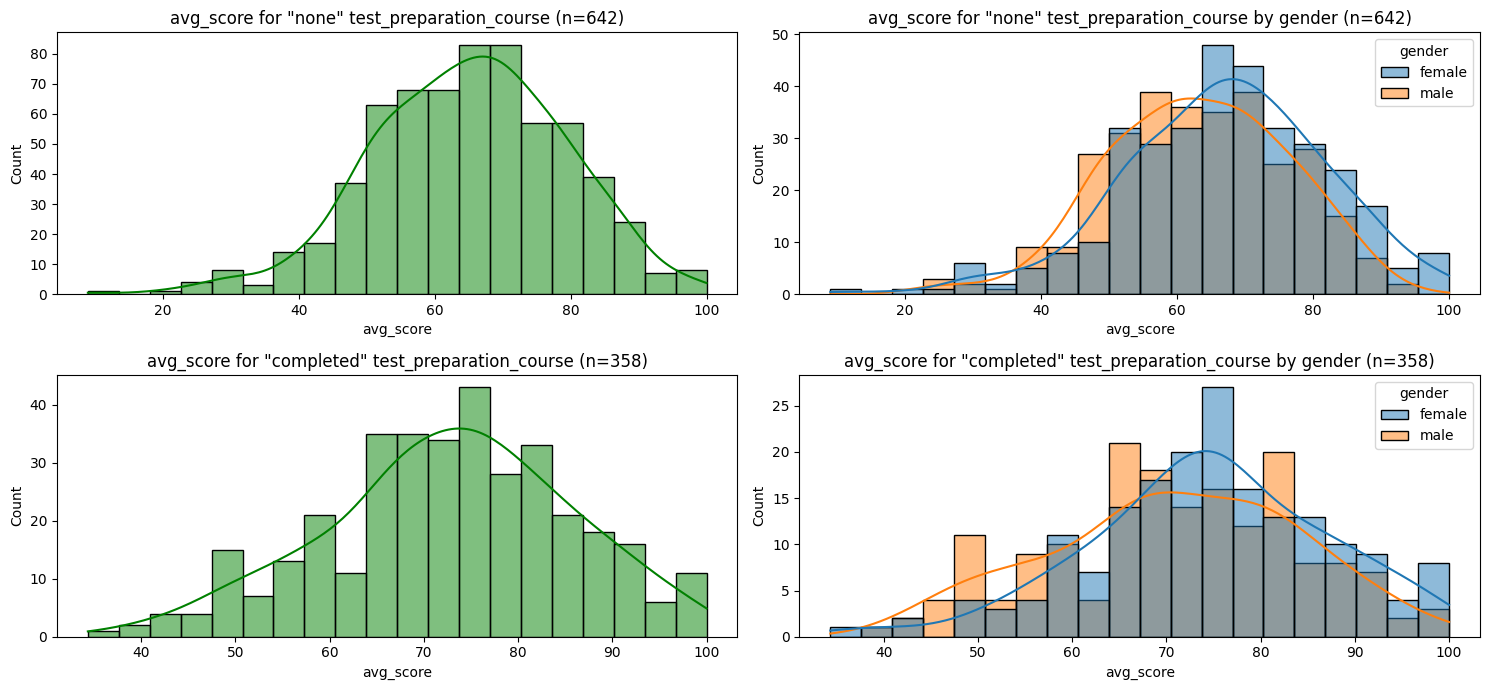

In [72]:

histogram_by_categories(raw_data,"gender", "test_preparation_course", "avg_score")

### Scores by gender by ethnicity

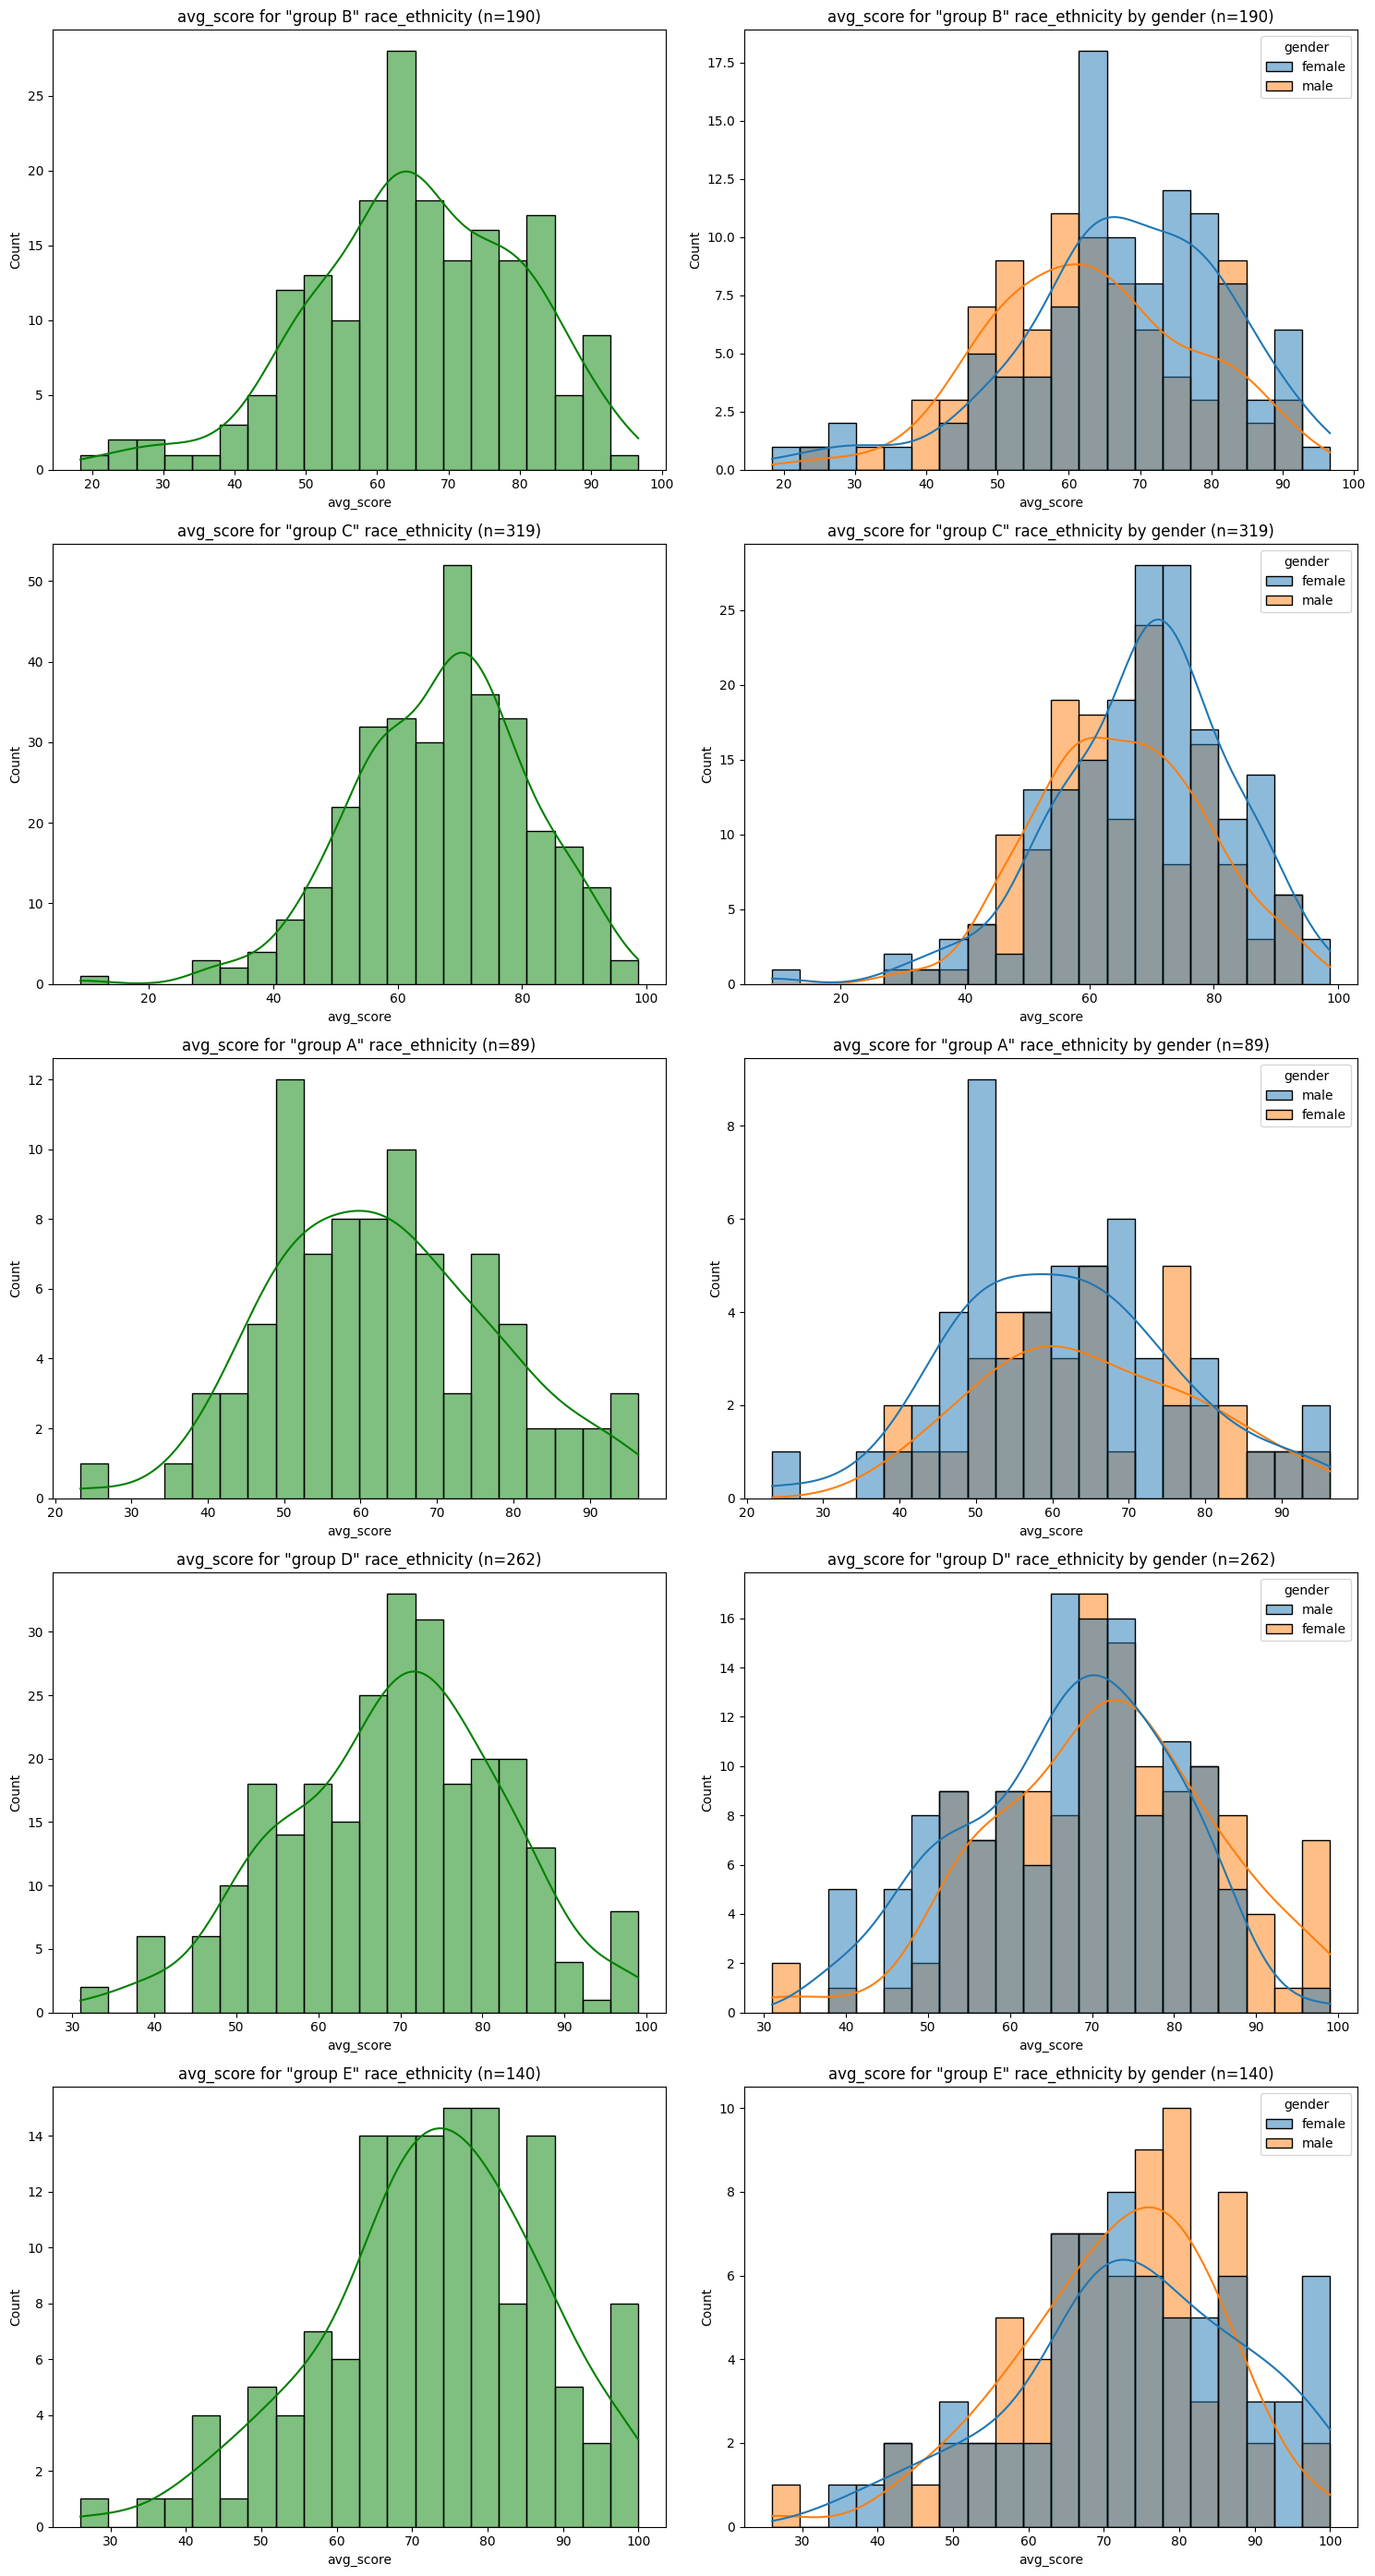

In [73]:
histogram_by_categories(raw_data,"gender", "race_ethnicity", "avg_score")

## 4.2 TODO Multivariate EDA - Correlation, clustering, etc

# Testing and ref area

In [41]:
raw_data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'avg_score', 'total_score'],
      dtype='object')

In [63]:
raw_data['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)